In [4]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

In [5]:
def load_data_from_csv(file_path):
    """
    Load Open Interest data from CSV file.
    :param file_path: Path to the CSV file.
    :return: DataFrame containing Open Interest data.
    """
    return pd.read_csv(file_path, skiprows=1)

In [6]:
current_date='07022025'
OPEN_INTEREST_PATH = f'./data/fao_participant_oi_{current_date}.csv'
TRADING_VOLUME_PATH = f'./data/fao_participant_vol_{current_date}.csv'
TYPE = {
    'OPEN_INTEREST': 'Open Interest',
    'TRADING_VOLUME' : 'Trading Volume'
}

In [7]:
def parse_data_from_csv(file_path):
    """
    Parse Open Interest data from CSV file.
    :param file_path: Path to the CSV file.
    :return: Dictionary containing FII, PRO, and Client positions.
    """
    df = load_data_from_csv(file_path)
    df.head()
    columns_mapping = {
    "Client Type": "Participant Type",
    "Future Index Long": "LongFut", "Future Index Short": "ShortFut",
    "Option Index Call Long": "LongCall", "Option Index Call Short": "ShortCall",
    "Option Index Put Long": "LongPut", "Option Index Put Short": "ShortPut"
    }
    df = df.rename(columns=columns_mapping)
    df.columns = df.columns.str.replace(r"\s+", " ", regex=True) 
    df.columns = df.columns.str.strip()  # Removes unwanted spaces & tabs
    df.columns = [re.sub(r'[^A-Za-z0-9 ]+', '', col) for col in df.columns]
    df["FutRatio"] = df["LongFut"] / df["ShortFut"]
    return df

In [8]:
df_open_interest = parse_data_from_csv(OPEN_INTEREST_PATH)
df_open_interest.head()


,Participant Type,LongFut,ShortFut,Future Stock Long,Future Stock Short,LongCall,LongPut,ShortCall,ShortPut,Option Stock Call Long,Option Stock Put Long,Option Stock Call Short,Option Stock Put Short,Total Long Contracts,Total Short Contracts,FutRatio
0,Client,226215,87421,2552442,313942,2106339,1614047,2194692,1891898,2098689,800483,1059804,906829,9398216,6454586,2.587651
1,DII,68477,57794,223119,4057831,70,16219,0,0,5084,0,354620,0,312969,4470245,1.184846
2,FII,38229,200697,3450833,2276138,561804,598457,524497,426563,192040,232486,440452,244762,5073849,4113109,0.190481
3,Pro,34740,21749,718863,297346,957092,810079,906116,720342,881161,891609,1322098,772987,4293544,4040638,1.597315
4,TOTAL,367661,367661,6945257,6945257,3625305,3038803,3625305,3038803,3176974,1924578,3176974,1924578,19078578,19078578,1.000000


In [9]:
df_trading_volume = parse_data_from_csv(TRADING_VOLUME_PATH)
df_trading_volume.head()

,Participant Type,LongFut,ShortFut,Future Stock Long,Future Stock Short,LongCall,LongPut,ShortCall,ShortPut,Option Stock Call Long,Option Stock Put Long,Option Stock Call Short,Option Stock Put Short,Total Long Contracts,Total Short Contracts,FutRatio
0,Client,106492,107542,437744,434814,11492198,10738993,11533152,10792938,1657785,724879,1606615,725073,25158091,25200134,0.990236
1,DII,2160,197,59046,68934,0,0,0,5395,0,0,34859,0,61206,109385,10.964467
2,FII,19036,25369,360132,357921,1974943,2080135,1953652,2060470,431384,278018,433507,275425,5143648,5106344,0.750365
3,Pro,76519,71099,680979,676232,17787168,17548837,17767505,17509162,2709602,1677554,2723790,1679953,40480659,40427741,1.076232
4,TOTAL,204207,204207,1537901,1537901,31254309,30367965,31254309,30367965,4798771,2680451,4798771,2680451,70843604,70843604,1.000000


In [10]:
def plot_futures_graph(participant_type, data, type):
    """
    Plot the Open Interest of Index Futures for a given client type.
    :param client_type: Client type (FII, PRO, or Client).
    :param data: Dictionary containing FII, PRO, and Client positions.
    """
    long_fut = data.loc[data["Participant Type"] == participant_type, "LongFut"].iloc[0]
    short_fut = data.loc[data["Participant Type"] == participant_type, "ShortFut"].iloc[0]
    categories = ["Long Futures", "Short Futures"]  # Labels for bars
    values = [long_fut, short_fut]
    
    plt.figure(figsize=(6, 4))  # Set figure size

    plt.bar(categories, values, color=['blue', 'red'])
    plt.ylabel("Value")
    plt.title(f"{participant_type} Long and Short Futures - {type}")
    # Show plot
    plt.show()

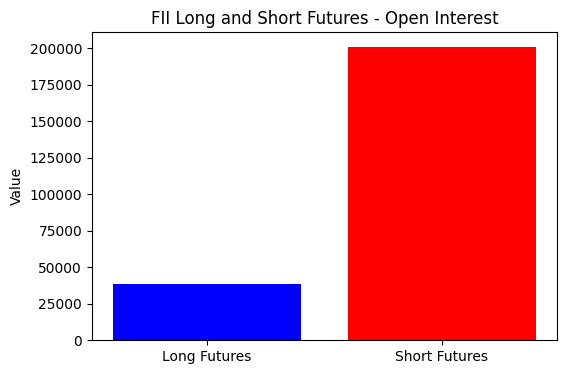

In [11]:
plot_futures_graph("FII", df_open_interest, TYPE["OPEN_INTEREST"])

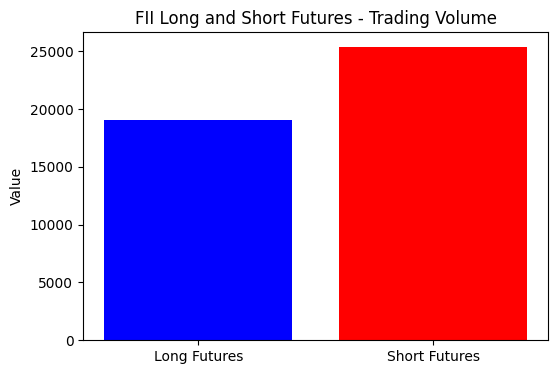

In [12]:
plot_futures_graph("FII", df_trading_volume, TYPE["TRADING_VOLUME"])

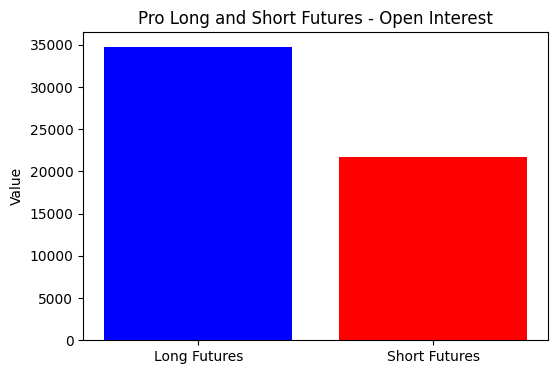

In [13]:
plot_futures_graph("Pro", df_open_interest, TYPE["OPEN_INTEREST"])

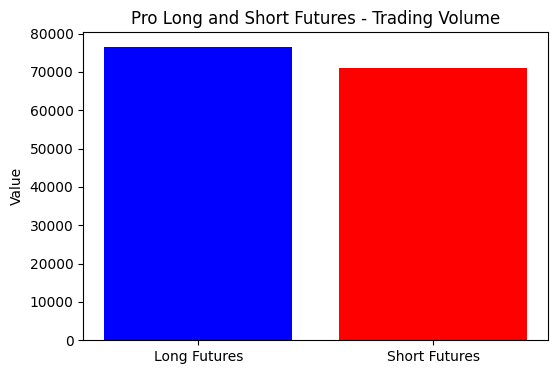

In [14]:
plot_futures_graph("Pro", df_trading_volume, TYPE["TRADING_VOLUME"])

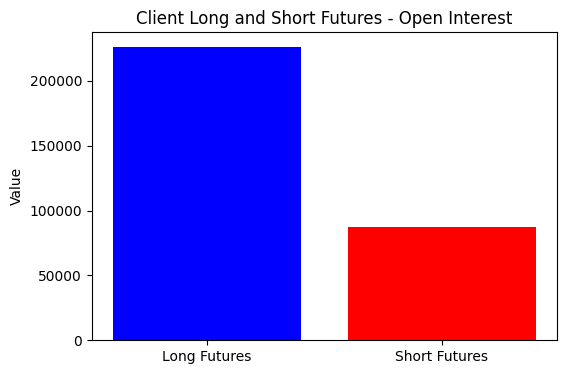

In [15]:
plot_futures_graph("Client", df_open_interest, TYPE["OPEN_INTEREST"])

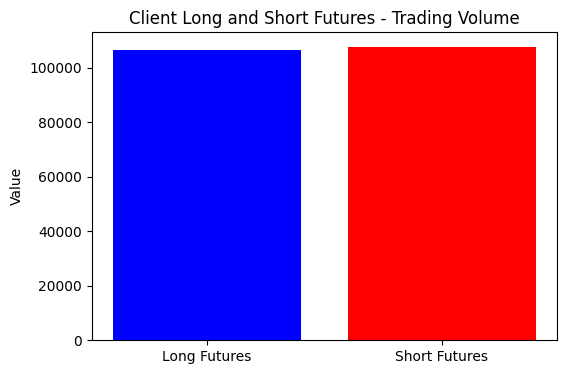

In [16]:
plot_futures_graph("Client", df_trading_volume, TYPE["TRADING_VOLUME"])

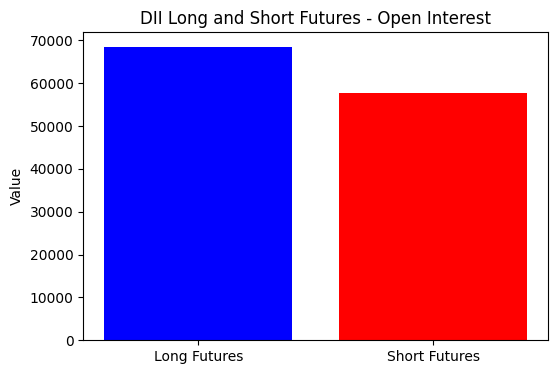

In [17]:
plot_futures_graph("DII", df_open_interest, TYPE["OPEN_INTEREST"])

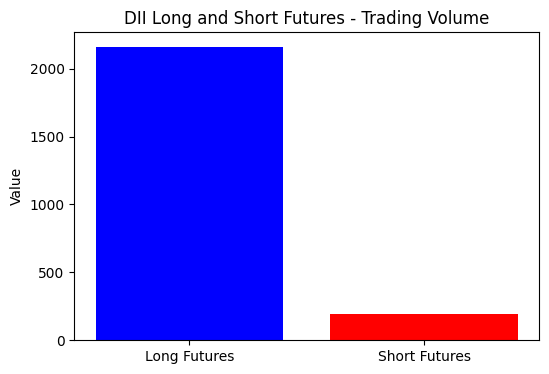

In [18]:
plot_futures_graph("DII", df_trading_volume, TYPE["TRADING_VOLUME"])

In [19]:
def plot_participant_fut_ratio(df_open_interest, type):
    # Plotting the ratio
    plt.figure(figsize=(10, 6))
    # Define colors based on the ratio
    colors = ['blue' if ratio > 1 else 'red' if ratio < 1 else 'grey' for ratio in df_open_interest["FutRatio"]]
    plt.bar(df_open_interest["Participant Type"], df_open_interest["FutRatio"], color=colors)
    plt.xlabel('Participant Type')
    plt.ylabel('Ratio of Long Futures to Short Futures')
    plt.title(f'Comparison of Long to Short Futures Ratio for Participants - {type}')
    plt.show()

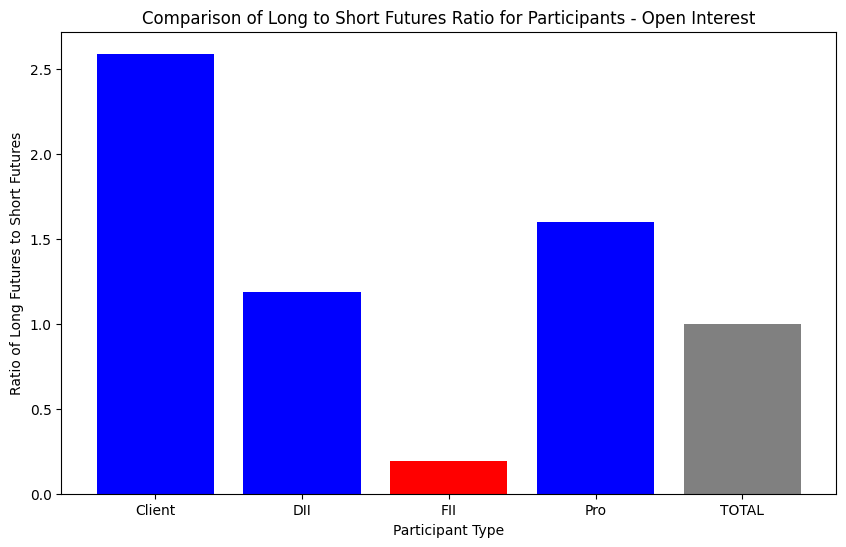

In [20]:
plot_participant_fut_ratio(df_open_interest, TYPE["OPEN_INTEREST"])

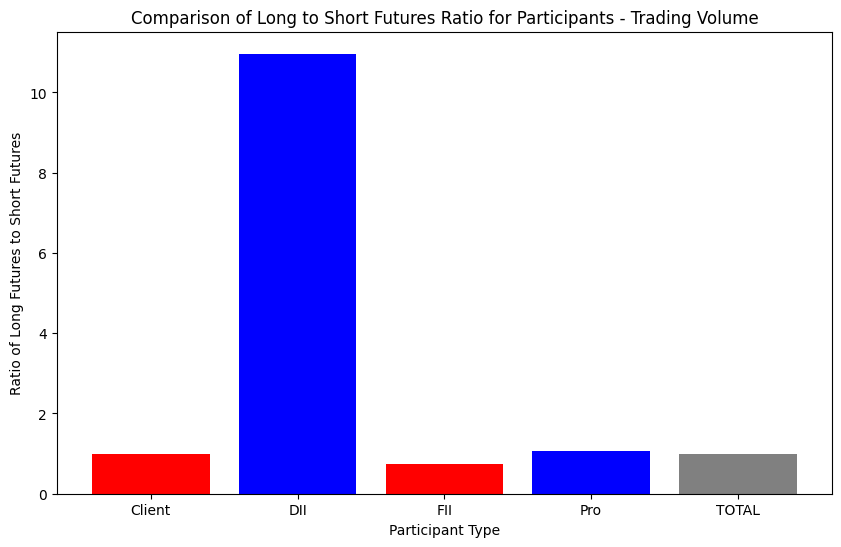

In [21]:
plot_participant_fut_ratio(df_trading_volume, TYPE["TRADING_VOLUME"])

In [22]:

def plot_total_contracts(data, type):
    # Extract participant types (excluding 'TOTAL' row)
    participant_types = data["Participant Type"][:-1]  
    
    # Extract total long and short contracts (excluding 'TOTAL' row)
    total_long = data["Total Long Contracts"][:-1]  
    total_short = data["Total Short Contracts"][:-1]  
    
    indices = np.arange(len(participant_types))  # X-axis positions
    width = 0.4  # Width of bars
    
    plt.figure(figsize=(10, 5))  # Set figure size
    
    # Plot bars side by side
    plt.bar(indices - width/2, total_long, width, color='blue', label='Total Long Contracts\t')
    plt.bar(indices + width/2, total_short, width, color='red', label='Total Short Contracts')
    
    # Labels and title
    plt.xlabel("Participant Type")
    plt.ylabel("Number of Contracts")
    plt.title(f"Total Long vs Short Contracts by Participant Type - {type}")
    plt.xticks(indices, participant_types, rotation=45)  # Rotate x-axis labels for clarity
    plt.legend()
    
    # Show the plot
    plt.show()

/Users/Z009TZW/Documents/my_files/trade_formula/local/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


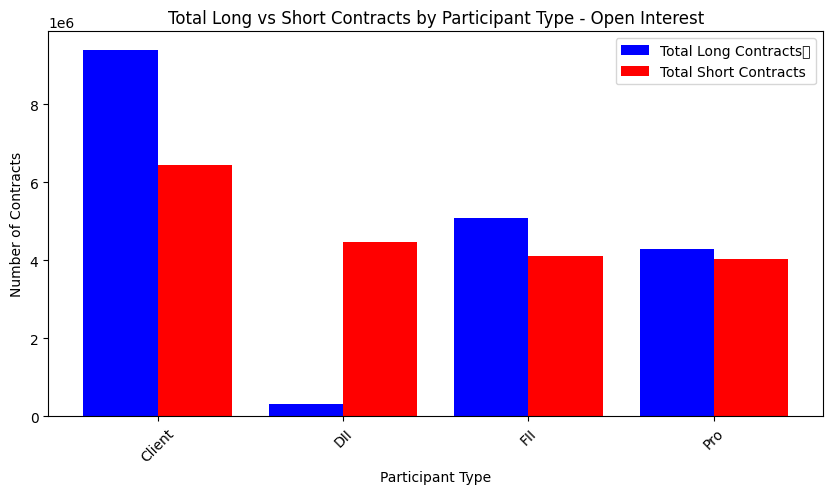

In [23]:
plot_total_contracts(df_open_interest, TYPE["OPEN_INTEREST"])

/Users/Z009TZW/Documents/my_files/trade_formula/local/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


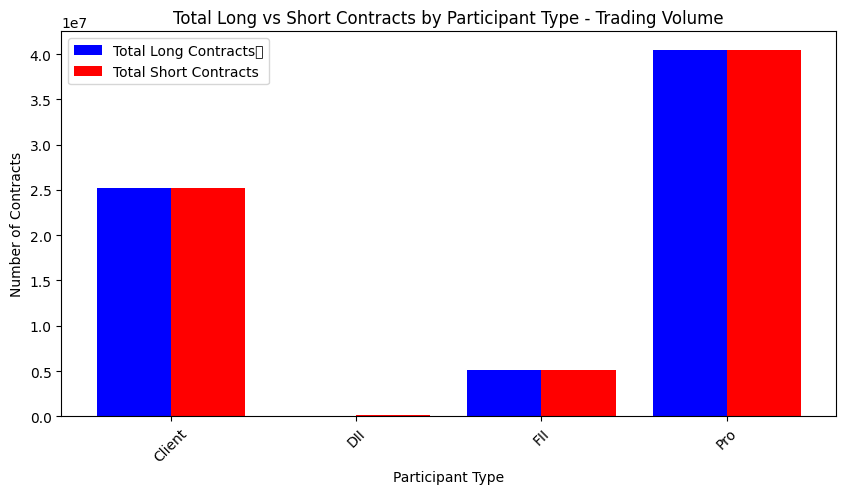

In [24]:
plot_total_contracts(df_trading_volume, TYPE["TRADING_VOLUME"])

In [25]:
def plot_net_options(data, type):
    # (call long + put short)-(call short + put long)
    # Compute Net Options for each participant
    net_options = (data["LongCall"] + data["ShortPut"]) - (data["ShortCall"] + data["LongPut"])
    
    # Extract participant types (excluding 'TOTAL' row)
    participant_types = data["Participant Type"][:-1]
    net_options = net_options[:-1]  # Exclude 'TOTAL' row
    
    indices = np.arange(len(participant_types))  # X-axis positions
    
    plt.figure(figsize=(10, 5))  # Set figure size
    
    # Define colors based on net options value
    colors = ['green' if value > 0 else 'red' for value in net_options]
    
    # Plot bar chart
    plt.bar(participant_types, net_options, color=colors, label="Net Options")
    
    # Labels and title
    plt.xlabel("Participant Type")
    plt.ylabel("Net Options Value")
    plt.title(f"Net Options Position by Participant Type - {type}")
    plt.xticks(rotation=45)  # Rotate x-axis labels for readability
    plt.axhline(0, color='black', linewidth=0.8)  # Add horizontal line at 0
    plt.legend()
    
    # Show the plot
    plt.show()

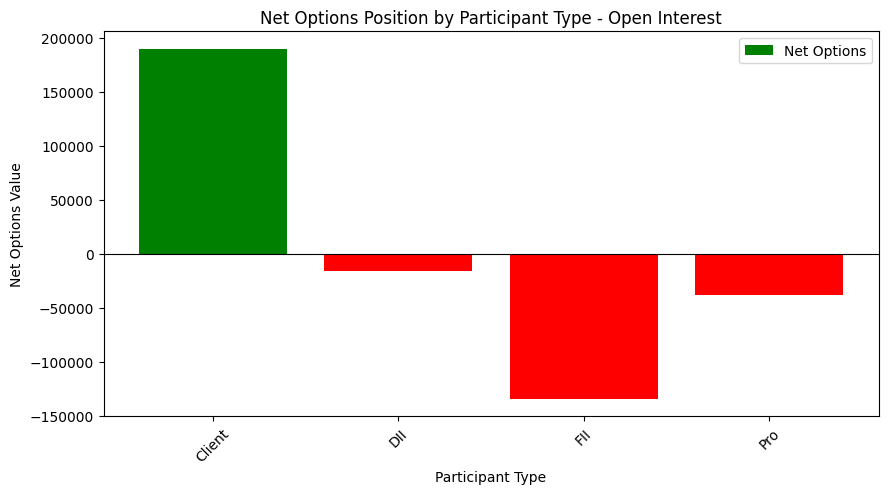

In [26]:
plot_net_options(df_open_interest, TYPE["OPEN_INTEREST"])

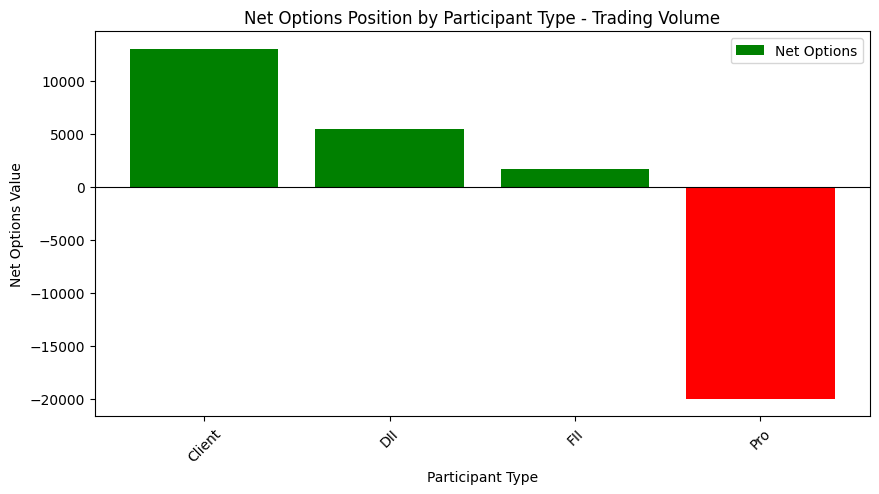

In [27]:
plot_net_options(df_trading_volume, TYPE["TRADING_VOLUME"])